1) Cargar y proyectar

  ideology_id                         name       PC1       PC2
0         I01           Socialismo clásico  1.278957  1.853319
1         I02          Liberalismo clásico  0.500538 -3.853923
2         I03  Conservadurismo tradicional -3.233129 -1.197374
3         I04    Anarquismo individualista  3.007062 -2.889090
4         I05             Socialdemocracia  3.263073 -0.165929


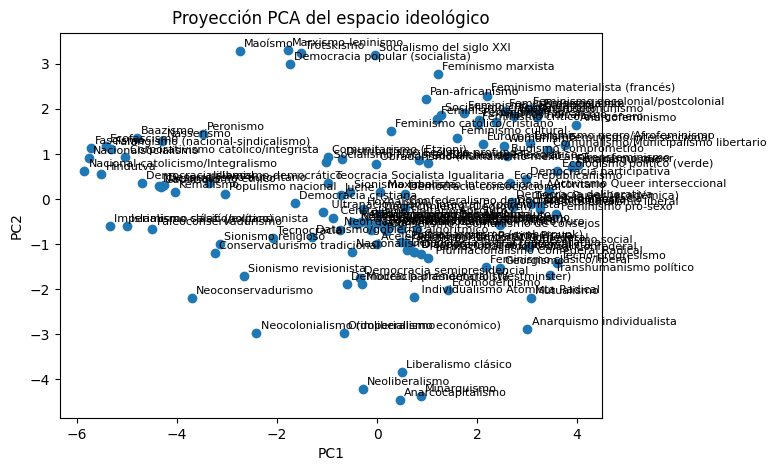

In [1]:
from pathlib import Path
import sys
base = "."
sys.path.insert(0, base)

from embedder import EmbeddingSpace
space = EmbeddingSpace(base)
space.load()

# Ajusta proyección (PCA 2D) y guarda gráfico
space.fit_projection(n_components=2)
proj = space.plot_projection(save_path=f"{base}/figures/projection.png")

# Tabla con PC1 y PC2
print(proj.head())

2) Añadir nuevas dimensiones e ideologías

In [8]:
# Nueva dimensión (ejemplo)
space.add_dimension(
    dimension_id="D15",
    name="Pro-ciencia vs Anti-ciencia",
    neg_label="Anti-ciencia",
    pos_label="Pro-ciencia",
    description="Actitud hacia el consenso científico y métodos verificables.",
    scale_min=-1.0, scale_max=1.0, default_weight=1.0
)

# Nueva ideología con sus scores (solo especifica lo que conozcas; el resto se rellena con 0)
space.add_ideology(
    ideology_id="I09",
    name="Eco-republicanismo",
    scores={"D12": 0.9, "D11": 0.6, "D08": 0.3, "D10": 0.2}
)

3) Distancias y “vecinos” ideológicos

In [12]:
import numpy as np

# Vector hipotético en el espacio (longitud = #dimensiones actuales)
v = np.zeros(len(space.dimensions))
nn = space.nearest(v, top_k=5)  # por distancia coseno
print(nn)

  ideology_id                         name  distance
0         I01           Socialismo clásico       1.0
1         I02          Liberalismo clásico       1.0
2         I03  Conservadurismo tradicional       1.0
3         I04    Anarquismo individualista       1.0
4         I05             Socialdemocracia       1.0


4. Entrenar Modelo de texto -> Embedding

In [41]:
from embedder import TextRegressor
tr = TextRegressor(base)
tr.load(space)
tr.train(alpha=1.0, max_features=200000, ngram_range=(1,2))  # guarda text_regressor.joblib

5) Inferencia desde texto y mapeo al vecino más cercano

In [54]:
# Carga modelo entrenado y predice vector para un texto
tr.load_trained()
vec = tr.predict("primero los pobres")
print("Vector:", vec)

# Semejantes más cercanos en el espacio
print(space.nearest(vec, top_k=10))


Vector: [ 3.14863627e-02  5.67422655e-01  4.83473056e-01  8.43425810e-02
 -5.04208240e-01  6.71446147e-01  5.01292181e-01  2.29862057e-01
 -5.38653864e-02  3.23224010e-01  4.81188156e-01  5.53793995e-01
  2.88099828e-01 -2.15520502e-01  3.79717492e-03 -6.16760188e-02
  1.35715452e-01  9.43098798e-02  7.72897942e-02  9.50220045e-02
  2.05089589e-02  2.78801722e-01 -2.20803342e-01 -4.12331479e-01
 -5.34736670e-01 -2.99589105e-01  2.79083760e-01  1.83701631e-01
  1.02010497e-01  6.85379552e-01  8.43876098e-01 -6.81156091e-02
  2.75095872e-01  5.54578003e-01  2.52442488e-01 -3.52503442e-01
  6.15074542e-01  7.49408149e-01  6.71475584e-01 -9.70914485e-02
  6.92887101e-01  3.96055482e-01  2.15287695e-01  6.49405912e-01
  5.89027429e-01  3.31706533e-01  5.89063939e-01 -5.91242099e-02
  7.41103946e-04  8.97124584e-01  2.32880090e-01  3.01522361e-01]
  ideology_id                                  name  distance
0         I42                         Ecosocialismo  0.069477
1         I81         